In [8]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


beta_rel = 0.037
gamma = 1.0006852036131262

I=5*1e-3
L = 2.33 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 0.01 # <E> [eV] = kb*T
T_l =  0.001 # <E> [eV]
B = 0.01  # T for ELENA
B_ratio=1e-10
Z=1

c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



length = 30 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T


beta_x=2.1
beta_y=2.2
emittance=10*1e-6

arc=dtk.LinearTransferMatrix(Q_x=2.36168984503, Q_y=1.38992572490,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=0,disp_x_1=0,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )



In [9]:
num_turns=int(3e6)
num_particles=1
step=1


    

# initialize arrays
x = []
px = []
y = []
py = []
action_x = []
action_y = []
force = []

dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                            T_perp=T_perp,T_l=T_l,
                                            B=B,Z=Z,B_ratio=1e-3,
                                            Neutralisation_space_charge=0,Neutralisation_rotation=0)


dtk_particle = dtk.TestParticles(
    
    mass0=mass0,
    p0c=p0c,
    x=20*1e-3,
    px=0,
    y=0,
    py=0,
    delta=0,
    zeta=0)


goal_action=1e-8

# loop over turns
for i in tqdm(range(num_turns)):
    if i % step == 0:
        # append coordinates to arrays
        x.append(dtk_particle.x)
        px.append(dtk_particle.px)
        y.append(dtk_particle.y)
        py.append(dtk_particle.py)
        
        # calculate action in horizontal plane
        action_x_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
        action_x.append(action_x_temp)
        
        # calculate action in vertical plane
        action_y_temp = 0.5*(dtk_particle.y**2/beta_y + beta_y*dtk_particle.py**2)
        action_y.append(action_y_temp)
        
        if action_x_temp < goal_action:
            print(f"Reached goal action of {goal_action} in {i} turns.")
            break
                
    # track particle through arc and cooler
    arc.track(dtk_particle)
    dtk_cooler.track(dtk_particle)

# convert arrays to numpy arrays
x = np.array(x)
px = np.array(px)
y = np.array(y)
py = np.array(py)
action_x = np.array(action_x)
action_y = np.array(action_y)
force = np.array(force)

amplitude_x=np.sqrt(2*action_x[::-1]*beta_x)

time = np.arange(0, num_turns, step) * ms_per_turn
time = time[:len(amplitude_x)]



        


100%|██████████| 3000000/3000000 [03:56<00:00, 12659.37it/s]


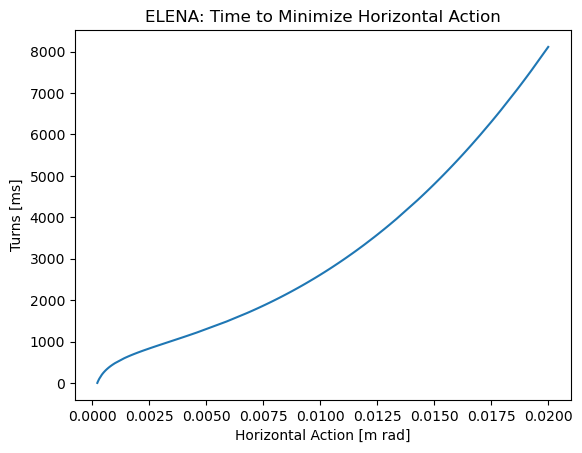

In [10]:
# Plot the horizontal action versus time
plt.figure()
plt.plot(amplitude_x,time)
plt.ylabel('Turns [ms]')
plt.xlabel('Horizontal Action [m rad]')
plt.title('ELENA: Time to Minimize Horizontal Action')
plt.ticklabel_format(useOffset=False)

